<hr style="border-width:2px;border-color:#75ADR1">

# Models

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as pximport 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression, mutual_info_regression, RFE, RFECV
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score, accuracy_score


from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 

import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import xgboost as xgb

In [2]:
df_training_norm  = pd.read_csv('df_training_norm_reduced.csv', sep = ',', index_col=0)

In [3]:
df_training_norm.head()

,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,0.100000,0.104513,0.006667,0.000000,0.879223,0.032510,0.034483,1.00,0.75,1.0
1,0.048129,0.224967,0.523333,0.168539,0.286337,0.149545,0.931034,0.75,0.75,0.0
2,0.031621,0.594919,0.006667,0.146067,0.926117,0.472042,0.689655,0.50,0.75,1.0
3,0.040155,0.323442,0.616667,0.000000,0.984040,0.338101,0.448276,0.75,0.75,0.0
4,0.066667,0.349223,0.673333,0.000000,0.287779,0.058518,0.620690,1.00,1.00,0.0


In [4]:
df_training_norm.columns

Index(['DATA', 'INCOME', 'OVERCHARGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'REPORTED_SATISFACTION',
       'CONSIDERING_CHANGE_OF_PLAN', 'CHURNED'],
      dtype='object')

In [5]:
selectedCols = ['DATA','INCOME', 'HOUSE', 'OVERCHARGE', 'OVER_15MINS_CALLS_PER_MONTH', 'REPORTED_SATISFACTION',
       'CONSIDERING_CHANGE_OF_PLAN', 'HANDSET_PRICE']

## Logistic Regression

In [6]:
X = df_training_norm.drop(['CHURNED'], axis = 1)
Y = df_training_norm['CHURNED']

x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=100)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
clf_LR = LogisticRegression(random_state=1).fit(x_train, y_train)

In [8]:
clf_LR.score(x_train, y_train)

0.7074702512119877

In [9]:
clf_LR.score(x_test, y_test)

0.7171806167400882

In [10]:
y_pred_LR = clf_LR.predict(x_test)
y_proba_LR = clf_LR.predict_proba(x_test)

In [11]:
y_pred_LR = clf_LR.predict(x_test)
roc_auc_score(y_pred_LR, y_test)

0.6859823643553657

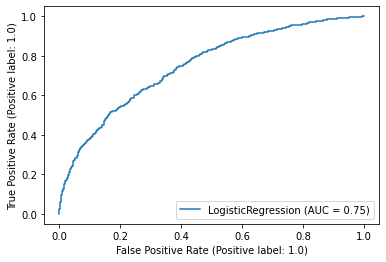

In [12]:
metrics.plot_roc_curve(clf_LR, x_test, y_test) ;

## SVM 

In [13]:
X = df_training_norm.drop(['CHURNED'], axis = 1)
Y = df_training_norm['CHURNED']


x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=10)

In [14]:
clf_SVM = svm.SVC(gamma= 0.01, kernel = 'poly')
clf_SVM.fit(x_train, y_train)

SVC(gamma=0.01, kernel='poly')

In [15]:
clf_SVM.score(x_train, y_train)

0.632327016306743

In [16]:
clf_SVM.score(x_test, y_test)

0.6440528634361233

In [17]:
parametres = {'C':[0.1, 1, 10], 'kernel':['rbf', 'linear', 'poly'], 'gamma':[0.001, 0.1, 0.5]}

In [ ]:
grid_clf_SVM = model_selection.GridSearchCV(estimator = clf_SVM, param_grid = parametres, scoring = 'roc_auc')
grille = grid_clf_SVM.fit(x_train,y_train)
print(grid_clf_SVM.best_params_)

In [18]:
clf_SVM = svm.SVC(gamma= 0.5, kernel = 'rbf', C=10)
clf_SVM.fit(x_train, y_train)

SVC(C=10, gamma=0.5)

In [19]:
clf_SVM.score(x_train, y_train)

0.746364037020714

In [20]:
clf_SVM.score(x_test, y_test)

0.7242290748898679

In [21]:
y_pred_SVM = clf_SVM.predict(x_test)
roc_auc_score(y_pred_SVM, y_test)

0.7009830339321357

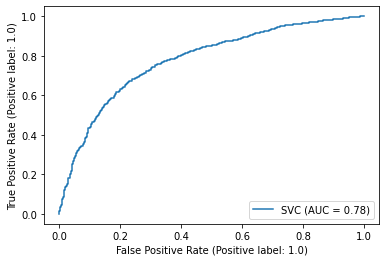

In [22]:
metrics.plot_roc_curve(clf_SVM, x_test, y_test) 

## Random Forest Regressor

In [23]:
X = df_training_norm.drop(['CHURNED'], axis = 1)
Y = df_training_norm['CHURNED']

X = df_training_norm[selectedCols]
Y = df_training_norm[['CHURNED']]

x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=10)

Tune hyper parameters

In [24]:
parametres = { 
    'n_estimators': [100,200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [8,12,15,18],
    'criterion' :['gini', 'entropy']
}

In [26]:
grid_clf_RF = model_selection.GridSearchCV(estimator= clf_RF, param_grid= parametres, scoring = 'roc_auc')
grille = grid_clf_RF.fit(x_train, y_train)
print(grid_clf_RF.best_params_)

In [27]:
clf_RF = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=100)
#clf_RF = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=100, max_features='auto', criterion='entropy')
clf_RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, random_state=100)

In [28]:
clf_RF.score(x_train, y_train)

0.9592331423534597

In [29]:
clf_RF.score(x_test, y_test)

0.7581497797356829

In [30]:
y_pred_RF = clf_RF.predict(x_test)
roc_auc_score(y_pred_RF, y_test)

0.7409887197094902

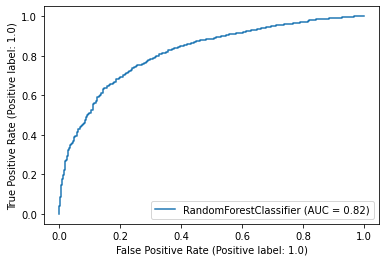

In [31]:
metrics.plot_roc_curve(clf_RF, x_test, y_test) 

## XGboost

In [ ]:
X = df_training_norm.drop(['CHURNED'], axis = 1)
Y = df_training_norm['CHURNED']


x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=10)

# Init classifier
cl_XGB = xgb.XGBClassifier(base_score=0.3, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=0.8, colsample_bytree=0.9, gamma=0.4,
              learning_rate=0.0400000012, max_delta_step=20, max_depth=14,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=75,  reg_alpha=0, reg_lambda=0, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)

cl_XGB.fit(x_train, y_train)


In [ ]:
cl_XGB.score(x_train, y_train)

In [ ]:
cl_XGB.score(x_test, y_test)

In [ ]:
y_pred_XGB = cl_XGB.predict(x_test)
roc_auc_score(y_pred_XGB, y_test)

In [ ]:
metrics.plot_roc_curve(cl_XGB, x_test, y_test) 

In [ ]:
# predThresH = (clf_RF.predict_proba(x_test)[:,1] >= 0.38).astype('int')
# accuracy_score(predThresH, y_test)
# roc_auc_score(predThresH, y_test)

### The best method is Random Forest

In [32]:
predThresH = (clf_RF.predict_proba(x_test)[:,1] >= 0.53).astype('int')
accuracy_score(predThresH, y_test)

0.7594713656387665

In [33]:
predThresH = (clf_RF.predict_proba(x_test)[:,1] >= 0.54).astype('int')
accuracy_score(predThresH, y_test)

0.760352422907489

In [34]:
predThresH = (clf_RF.predict_proba(x_test)[:,1] >= 0.53).astype('int')
accuracy_score(predThresH, y_test)

0.7594713656387665

In [35]:
threshold = 0.54

# Client discount

In [38]:
xToAnalyse = df_training_norm.copy()
#xToAnalyse = pd.read_csv('df_validation_norm.csv', sep = ',')

In [39]:
xToAnalyse["CHURN_LABEL"] = (clf_RF.predict_proba(xToAnalyse[selectedCols])[:,1] >= threshold).astype('int')
xToAnalyse["CHURN_PROBABILITY"] = clf_RF.predict_proba(xToAnalyse[selectedCols])[:,1]

In [40]:
xToAnalyse["CHURN_PROBABILITY"].head(10)

0    0.850627
1    0.154986
2    0.870316
3    0.328075
4    0.095884
5    0.660478
6    0.831108
7    0.872698
8    0.103557
9    0.332457
Name: CHURN_PROBABILITY, dtype: float64

In [41]:
df_training = pd.read_csv('df_training_reduced.csv', sep = ',')
#df_training = pd.read_csv('df_validation.csv', sep = ',')

<AxesSubplot:>

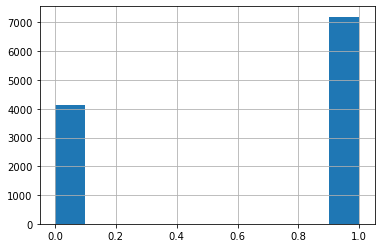

In [42]:
df_training.CHURNED.hist()

In [43]:
originalFacture = df_training["OVERCHARGE"] + df_training["REVENUE"]

In [44]:
discList = [0, 5, 10, 15, 20, 25, 30,35, 40, 45,50]
#discList = [0]
for disc in discList:
    beforeExpValue = np.multiply(xToAnalyse["CHURN_PROBABILITY"],originalFacture)
    xToAnalyse.iloc[:]["OVERCHARGE"]  = xToAnalyse["OVERCHARGE"]*(1.-float(disc)/float(100.))
    afterProba = clf_RF.predict_proba(xToAnalyse[selectedCols])[:,1]
    if disc == 0:
        afterExpValue = beforeExpValue
    else:
        afterExpValue = np.multiply(afterProba,originalFacture)*(1.-float(disc)/float(100.)) - 10.
        
    benefit = afterExpValue - beforeExpValue
    xToAnalyse["disc_"+str(disc)] = disc
    xToAnalyse[str(disc)] = benefit

In [45]:
colsDisc = []
[colsDisc.append(str(disc)) for disc in discList]
colsDisc

['0', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50']

In [46]:
xToAnalyse["maxBenefit"] = xToAnalyse[colsDisc].loc[:].max(axis=1)
xToAnalyse["DISCOUNT"] = xToAnalyse[colsDisc].loc[:].idxmax(axis=1).astype(int)


<AxesSubplot:>

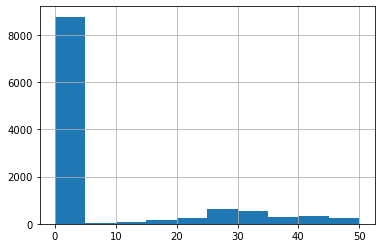

In [47]:
xToAnalyse["DISCOUNT"].hist()

<AxesSubplot:>

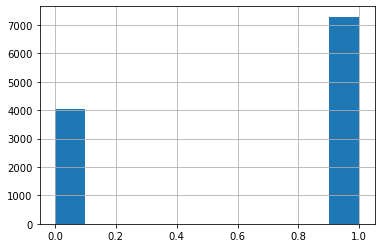

In [48]:
xToAnalyse["CHURN_LABEL"].hist()

In [49]:
xToAnalyse[colsDisc].head(20)

,0,5,10,15,20,25,30,35,40,45,50
0,0.0,-16.805015,-23.610030,-30.415044,-37.220059,-44.025074,-50.830089,-57.635104,-64.440118,-71.245133,-78.050148
1,0.0,-5.867568,-4.951894,-4.703972,17.597886,6.015249,12.902355,23.136950,25.675326,18.672871,12.473395
2,0.0,-15.526506,-21.053011,-26.579517,-32.106023,-37.632528,-43.159034,-48.685540,-54.212045,-59.738551,-65.265056
3,0.0,4.157357,12.340290,13.793977,7.203025,23.981894,27.892783,16.220388,9.953196,2.385520,-6.763363
4,0.0,-2.118308,-14.017577,-17.609808,-10.341739,39.973203,32.764074,49.457027,56.093315,56.765169,49.666063
5,0.0,-14.722418,-19.444836,-24.167254,-28.889672,-33.612090,-38.334509,-43.056927,-47.779345,-52.501763,-57.224181
6,0.0,-17.937086,-25.874171,-33.811257,-41.748343,-49.685429,-57.622514,-65.559600,-73.496686,-81.433771,-89.370857
7,0.0,-23.141944,-43.598889,-57.853056,-82.111399,-110.696394,-124.136047,-134.707996,-155.580372,-169.583085,-185.619976
8,0.0,-7.974607,-16.570278,-11.897734,10.330943,44.494551,56.161497,53.374183,42.924088,33.102040,25.577993
9,0.0,-19.100728,-11.115282,-29.252855,-36.216273,14.795534,4.792418,-5.584109,8.081852,1.558387,-7.337527


In [50]:
xToAnalyse["CLIENT_TO_CONTACT"] = 'NO'
xToAnalyse["CLIENT_TO_CONTACT"][xToAnalyse["DISCOUNT"]!=0] = 'YES'

<AxesSubplot:>

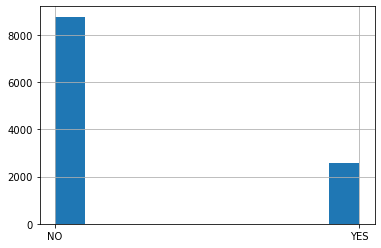

In [51]:
xToAnalyse["CLIENT_TO_CONTACT"].hist()

In [52]:
xToAnalyse.columns

Index(['DATA', 'INCOME', 'OVERCHARGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'REPORTED_SATISFACTION',
       'CONSIDERING_CHANGE_OF_PLAN', 'CHURNED', 'CHURN_LABEL',
       'CHURN_PROBABILITY', 'disc_0', '0', 'disc_5', '5', 'disc_10', '10',
       'disc_15', '15', 'disc_20', '20', 'disc_25', '25', 'disc_30', '30',
       'disc_35', '35', 'disc_40', '40', 'disc_45', '45', 'disc_50', '50',
       'maxBenefit', 'DISCOUNT', 'CLIENT_TO_CONTACT'],
      dtype='object')

# Client discount for validation

In [53]:
xToAnalyse = pd.read_csv('df_validation_norm.csv', sep = ',')

In [54]:
xToAnalyse["CHURN_LABEL"] = (clf_RF.predict_proba(xToAnalyse[selectedCols])[:,1] >= threshold).astype('int')
xToAnalyse["CHURN_PROBABILITY"] = clf_RF.predict_proba(xToAnalyse[selectedCols])[:,1]

In [55]:
xToAnalyse["CHURN_PROBABILITY"].head(10)

0    0.519383
1    0.455032
2    0.818781
3    0.957137
4    0.916525
5    0.976275
6    0.861452
7    0.437106
8    0.798016
9    0.540552
Name: CHURN_PROBABILITY, dtype: float64

In [56]:
df_validation = pd.read_csv('df_validation.csv', sep = ',')

In [57]:
originalFacture = df_validation["OVERCHARGE"] + df_validation["REVENUE"]

In [58]:
discList = [0, 5, 10, 15, 20, 25, 30,35, 40, 45,50,55,60,70]
#discList = [0]
for disc in discList:
    beforeExpValue = np.multiply(xToAnalyse["CHURN_PROBABILITY"],originalFacture)
    xToAnalyse.iloc[:]["OVERCHARGE"]  = xToAnalyse["OVERCHARGE"]*(1.-float(disc)/float(100.))
    afterProba = clf_RF.predict_proba(xToAnalyse[selectedCols])[:,1]
    if disc == 0:
        afterExpValue = beforeExpValue
    else:
        afterExpValue = np.multiply(afterProba,originalFacture)*(1.-float(disc)/float(100.)) - 10.
        
    benefit = afterExpValue - beforeExpValue
    xToAnalyse["disc_"+str(disc)] = disc
    xToAnalyse[str(disc)] = benefit

In [59]:
colsDisc = []
[colsDisc.append(str(disc)) for disc in discList]
colsDisc

['0',
 '5',
 '10',
 '15',
 '20',
 '25',
 '30',
 '35',
 '40',
 '45',
 '50',
 '55',
 '60',
 '70']

In [60]:
xToAnalyse["maxBenefit"] = xToAnalyse[colsDisc].loc[:].max(axis=1)
xToAnalyse["DISCOUNT"] = xToAnalyse[colsDisc].loc[:].idxmax(axis=1).astype(int)


<AxesSubplot:>

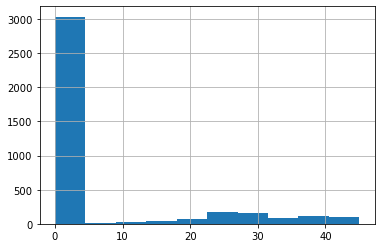

In [61]:
xToAnalyse["DISCOUNT"].hist()

<AxesSubplot:>

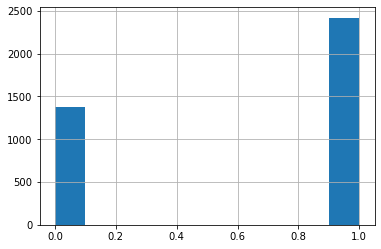

In [62]:
xToAnalyse["CHURN_LABEL"].hist()

In [63]:
xToAnalyse[colsDisc].head(20)

,0,5,10,15,20,25,30,35,40,45,50,55,60,70
0,0.0,-13.554763,-13.564461,-10.881240,-13.751707,-18.692600,-29.214711,-39.630230,-45.831982,-52.541140,-59.250299,-65.959457,-72.668615,-86.086931
1,0.0,-7.210083,-20.104736,-35.371035,-47.499826,-52.666276,-33.729146,-34.859190,-44.229204,-50.000304,-57.367404,-64.734504,-72.101604,-86.835804
2,0.0,-18.151243,-21.076248,-29.927455,-41.589328,-45.370225,-53.938002,-53.957279,-61.660986,-69.364694,-77.068401,-84.772109,-92.475816,-107.883231
3,0.0,-23.352059,-36.704118,-50.056177,-63.408236,-76.760295,-90.112354,-103.464413,-116.816472,-130.168531,-143.520590,-156.872649,-170.224708,-196.928826
4,0.0,-15.865761,-21.731522,-27.597283,-33.463044,-39.328805,-45.194566,-51.060327,-56.926088,-62.791850,-68.657611,-74.523372,-80.389133,-92.120655
5,0.0,-20.592585,-31.185170,-41.777755,-52.370340,-62.962925,-73.555510,-84.148094,-94.740679,-105.333264,-115.925849,-126.518434,-137.111019,-158.296189
6,0.0,-14.565694,-19.131389,-23.697083,-28.262777,-32.828471,-37.394166,-41.959860,-46.525554,-51.091248,-55.656943,-60.222637,-64.788331,-73.919720
7,0.0,-46.318386,-56.914237,-64.451880,-67.175503,-73.852155,-67.035127,-71.427895,-70.567753,-76.131444,-87.596426,-97.583299,-107.570171,-127.543917
8,0.0,-15.705817,-21.411635,-27.117452,-32.823270,-38.529087,-44.234905,-49.940722,-55.646540,-61.352357,-67.058175,-72.763992,-78.469810,-89.881445
9,0.0,-8.608993,-11.146396,-7.125412,-11.937682,-20.350881,-26.953738,-32.398551,-38.742283,-45.086015,-51.429747,-57.773480,-64.117212,-76.804676


In [64]:
xToAnalyse["CLIENT_TO_CONTACT"] = 'NO'
xToAnalyse["CLIENT_TO_CONTACT"][xToAnalyse["DISCOUNT"]!=0] = 'YES'

<AxesSubplot:>

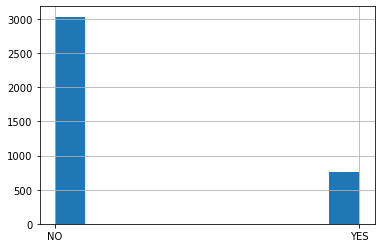

In [65]:
xToAnalyse["CLIENT_TO_CONTACT"].hist()

In [66]:
xToAnalyse.columns

Index(['Unnamed: 0', 'DATA', 'INCOME', 'OVERCHARGE', 'LEFTOVER', 'HOUSE',
       'CHILD', 'REVENUE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH',
       'TIME_CLIENT', 'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION',
       'CONSIDERING_CHANGE_OF_PLAN', 'CHURN_LABEL', 'CHURN_PROBABILITY',
       'disc_0', '0', 'disc_5', '5', 'disc_10', '10', 'disc_15', '15',
       'disc_20', '20', 'disc_25', '25', 'disc_30', '30', 'disc_35', '35',
       'disc_40', '40', 'disc_45', '45', 'disc_50', '50', 'disc_55', '55',
       'disc_60', '60', 'disc_70', '70', 'maxBenefit', 'DISCOUNT',
       'CLIENT_TO_CONTACT'],
      dtype='object')

In [67]:
df_result = xToAnalyse[["CHURN_PROBABILITY", "CHURN_LABEL", "CLIENT_TO_CONTACT", "DISCOUNT"]]

Il manque les ID pour les clients

In [68]:
df_val = pd.read_csv('validation.csv', sep = ',')

In [69]:
df_val = df_val[df_val['HOUSE'].notna()]
df_val.reset_index(inplace=True, drop=True)

In [70]:
df_result['CUSTOMER_ID'] = df_val['CUSTOMER_ID']

In [71]:
df_result.head()

,CHURN_PROBABILITY,CHURN_LABEL,CLIENT_TO_CONTACT,DISCOUNT,CUSTOMER_ID
0,0.519383,0,NO,0,C100002
1,0.455032,0,NO,0,C100003
2,0.818781,1,NO,0,C100004
3,0.957137,1,NO,0,C100005
4,0.916525,1,NO,0,C100007


In [72]:
df_result.to_csv("results.csv", sep=",")

### Exemple for one client

In [ ]:
reslist = []
iClient = 8
nbDisc = 10
maxBenefit = 0
discOpt = 0
for disc in range(nbDisc+1):
        beforeExpValue = xToAnalyse["proba"][iClient]*originalFacture[iClient]
        afterPrice  = xToAnalyse["OVERCHARGE"][iClient]*(1.-float(disc)/float(nbDisc))
        xToAnalyse[selectedCols].iloc[iClient]["OVERCHARGE"] = afterPrice
        afterProba = clf_RF.predict_proba(xToAnalyse[selectedCols].loc[iClient:iClient])[:,1][0]
        afterExpValue = afterProba*originalFacture[iClient]*(1.-float(disc)/float(nbDisc)) - 10.
        benefit = afterExpValue - beforeExpValue
        #reslist.append([disc, beforeExpValue, afterPrice, afterProba, afterExpValue, benefit])
        reslist.append([disc, benefit])